In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mende_a6lu6xc\AppData\Local\Temp\ipykernel_25632\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### **File request and transform**

**Dataset load**

In [3]:
hd = pd.read_csv('heart_data.csv',sep=',',header=0)
hd.head(5)

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1


**Gender fix**

In [4]:
# Changing gender by int to str
hd['gender'] = hd['gender'].astype(str)

# Apply function to replace numeric values to gender category
def map_gender(value):
  if value == "0":
    return "female"
  elif value == "1":
    return "male"
  else:
    return value  # Keep other values unchanged

hd['gender'] = hd['gender'].apply(map_gender)
hd.head(5)

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,female,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,female,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,male,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,female,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,male,1,311,1.8,0,2,1


**Chest pain fix**

In [5]:
# Changing chest_pain by int to str
hd['chest_pain'] = hd['chest_pain'].astype(str)

# Apply function to replace numeric values to gender category
def map_chest_pain(value):
  if value == "0":
    return "Typical angina"
  elif value == "1":
    return "Atypical angina"
  elif value == "2":
    return "Non-anginal pain"
  elif value == "3":
    return "Asymptomatic"
  else:
    return value  # Keep other values unchanged

hd['chest_pain'] = hd['chest_pain'].apply(map_chest_pain)
hd.head(5)

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,Asymptomatic,0,67,0,142,0,female,0,223,0.3,0,2,0
1,120,Non-anginal pain,0,50,0,158,0,female,1,219,1.6,0,0,0
2,126,Asymptomatic,2,35,0,156,1,male,0,282,0.0,2,0,1
3,150,Asymptomatic,2,63,0,154,0,female,1,407,4.0,2,3,1
4,140,Asymptomatic,2,46,0,120,1,male,1,311,1.8,0,2,1


## **Data visualization**

**Gender Histogram**

<Axes: xlabel='age', ylabel='Count'>

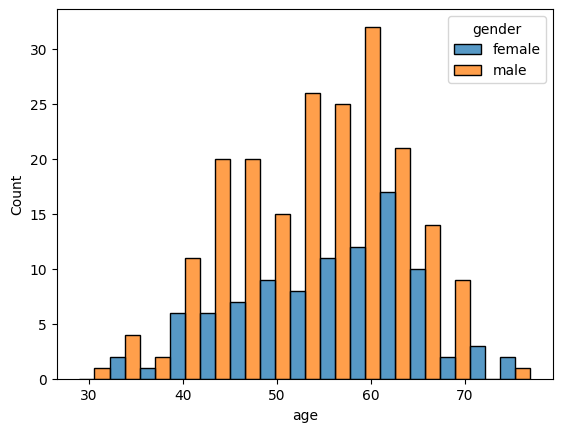

In [6]:
sns.histplot(data = hd, x= 'age', bins = 15, hue= 'gender', stat = 'count', multiple= 'dodge')

**Age | Max hr Scatter Plot**

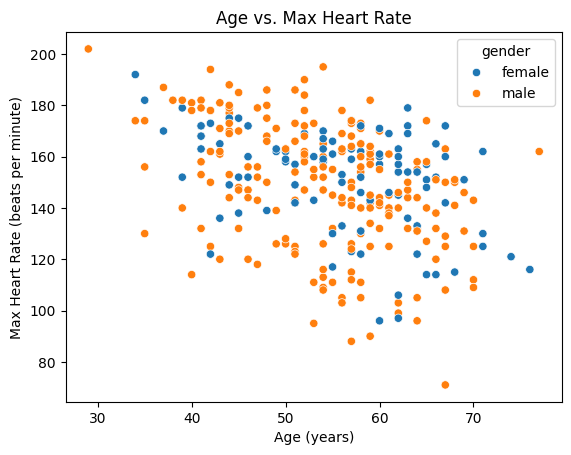

In [7]:
sns.scatterplot(x="age", y="max_hr", data=hd, hue= 'gender')
plt.title("Age vs. Max Heart Rate")
plt.xlabel("Age (years)")
plt.ylabel("Max Heart Rate (beats per minute)")
plt.show()

**Cholesterol curve**

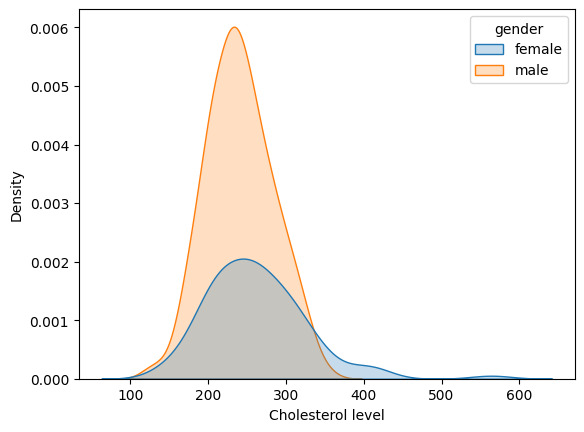

In [8]:
sns.kdeplot(data=hd, x='cholesterol', hue='gender', fill=True)
plt.xlabel("Cholesterol level")
plt.show()

**Box plot: Chest pain | Age**

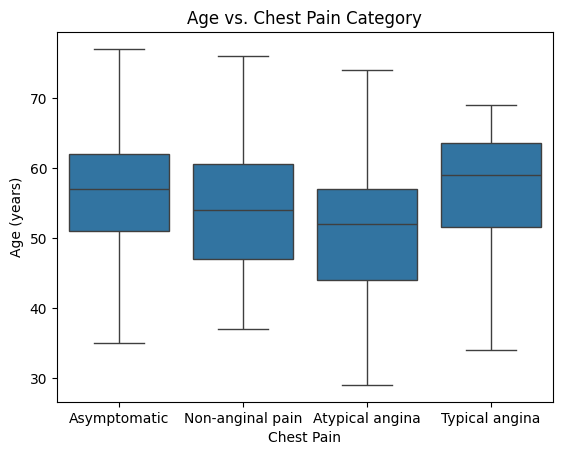

In [9]:
sns.boxplot(data= hd, x= 'chest_pain', y= 'age')
plt.title("Age vs. Chest Pain Category")
plt.xlabel("Chest Pain")
plt.ylabel("Age (years)")
plt.show()

**Histogram | Cumulative curve| Curve**

C:\Users\mende_a6lu6xc\AppData\Local\Temp\ipykernel_25632\3216021740.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


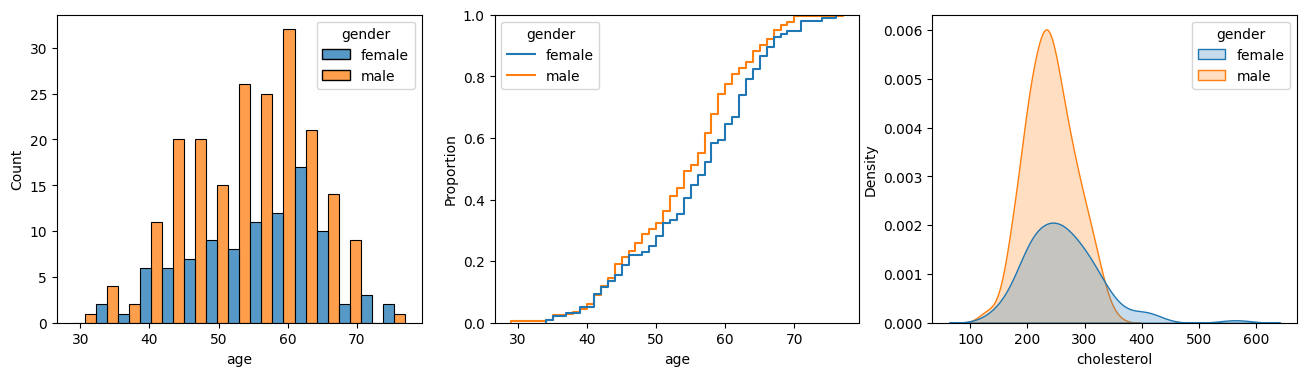

In [10]:
fig, ax =plt.subplots(1,3)
fig.set_size_inches(16, 4)
sns.histplot(data = hd, x= 'age', bins = 15, hue= 'gender', stat = 'count', multiple= 'dodge', ax=ax[0])
sns.ecdfplot(data=hd, x= 'age', hue= 'gender', ax=ax[1])
sns.kdeplot(data= hd, x='cholesterol', hue='gender', fill=True, ax=ax[2])
fig.show()

**Scatter | Joinplot | Histogram**

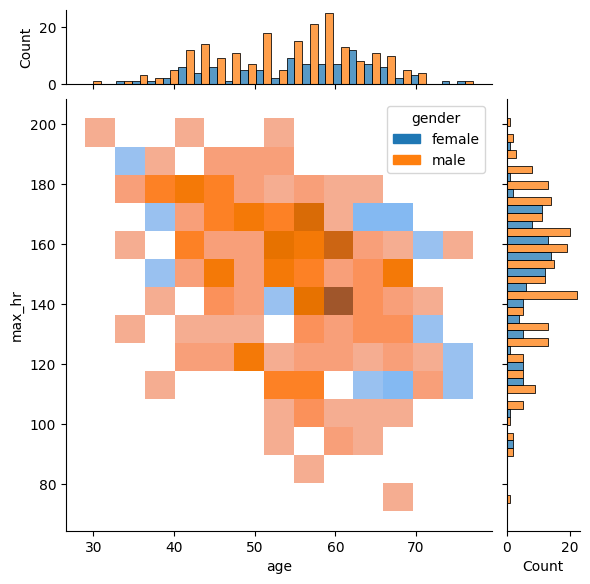

In [11]:
sns.jointplot(x="age", y="max_hr", data=hd, hue= 'gender', kind= 'hist', marginal_ticks=True, #Shows histogram outside
marginal_kws=dict(bins= 25, fill = True, multiple= 'dodge'))

**Correlation heatmap**

<Axes: >

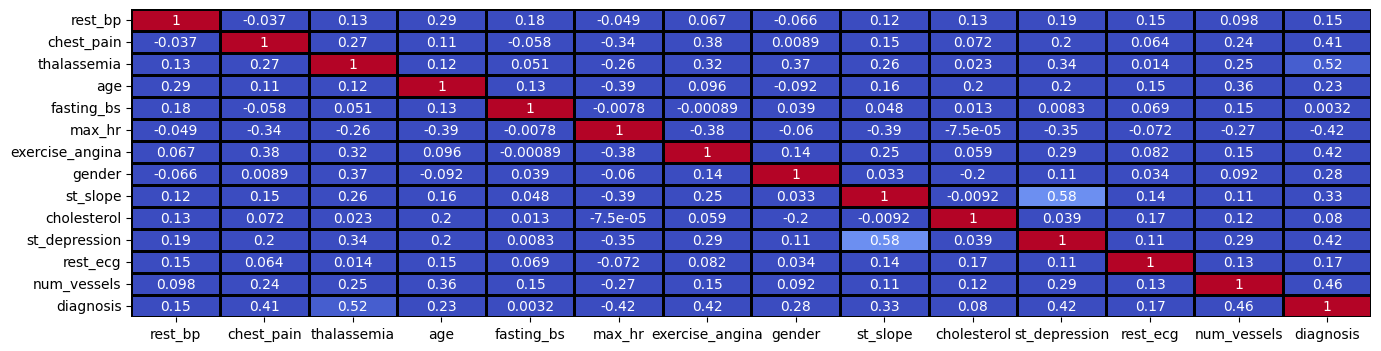

In [26]:
hd = pd.read_csv('heart_data.csv',sep=',',header=0) # set the original dataframe whit only numerical values
fig, ax =plt.subplots(1,1)
fig.set_size_inches(16, 4) # setting the size and proportions
sns.heatmap(hd.corr(), annot= True, cmap='coolwarm', linewidths=1, linecolor='black', vmin=0.5,vmax=1,cbar=False)
